In [ ]:

!pip install -q pandas numpy matplotlib seaborn scikit-learn joblib
!pip install -q fastapi uvicorn streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.2 MB/s eta 0:00:00


Please upload the .csv file.


Saving heart_disease_dataset.csv to heart_disease_dataset.csv

Dataset 'heart_disease_dataset.csv' loaded successfully.


Exploratory Data Analysis

First 5 rows of the dataset:
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4      

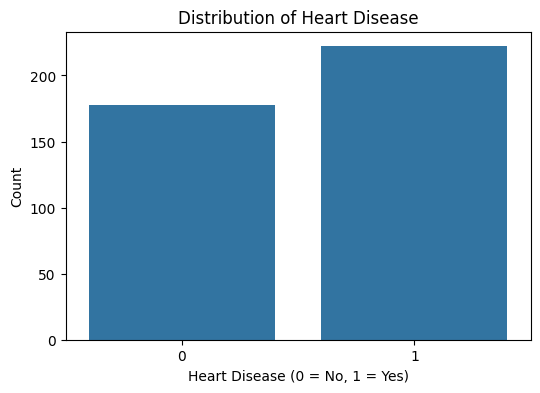

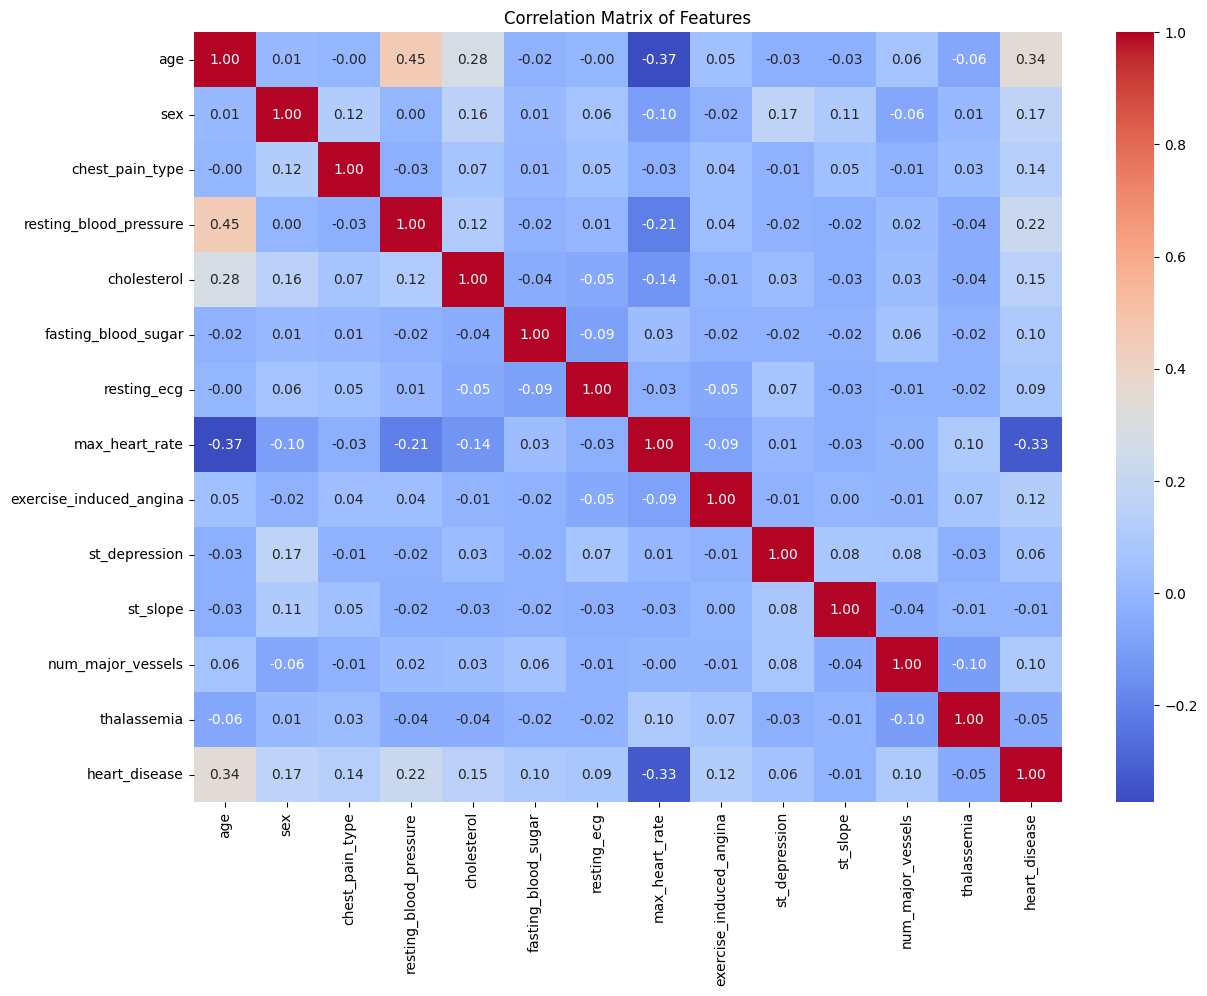

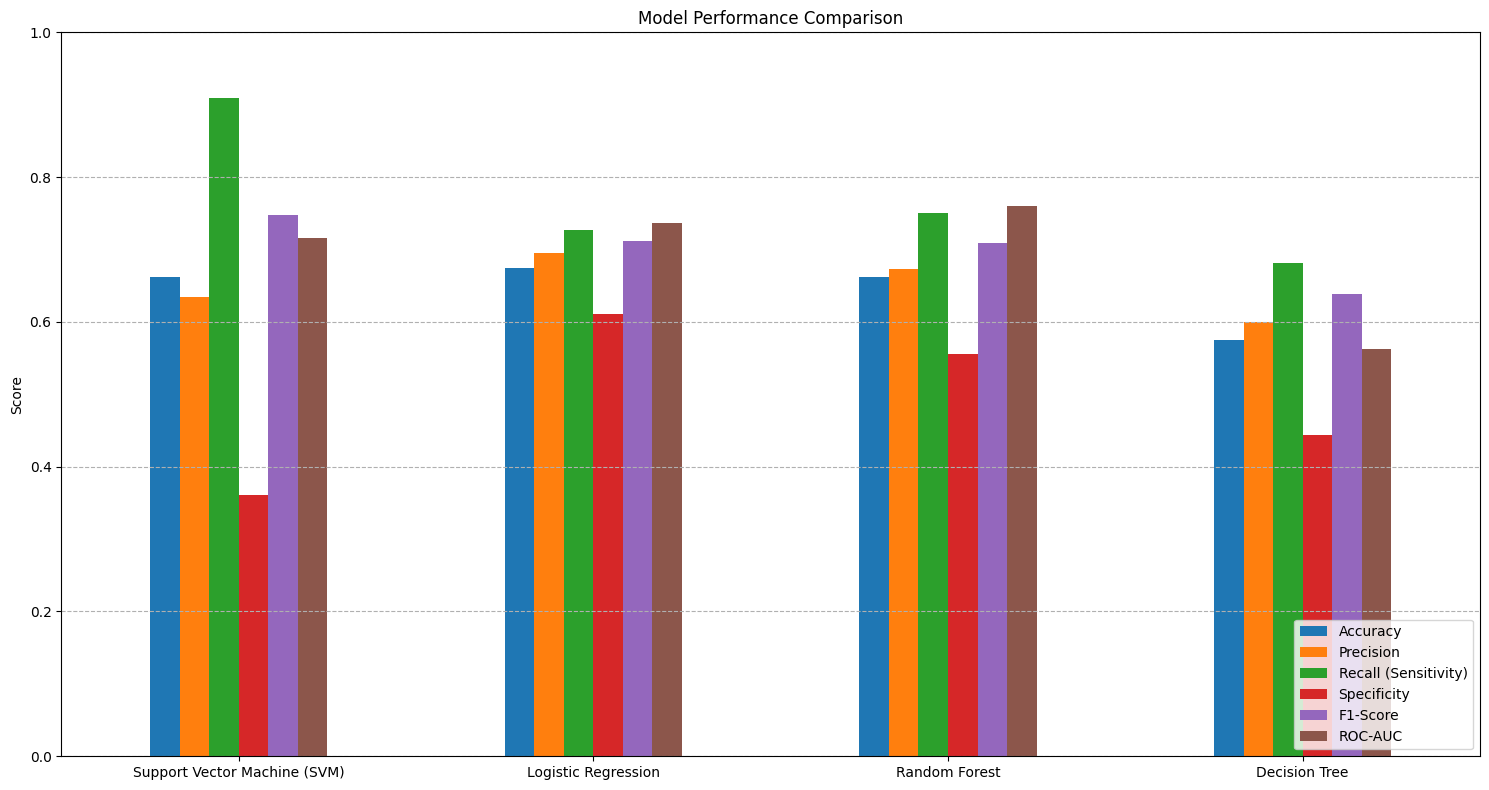

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from google.colab import files
import io

# --- Data Exploration, EDA, Preprocessing ---

# 1. Load the Dataset via Colab's upload prompt
print("Please upload the .csv file.")
uploaded = files.upload()

# Get the filename and load it into a pandas DataFrame
try:
    filename = next(iter(uploaded))
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\nDataset '{filename}' loaded successfully.\n")
except (StopIteration, KeyError):
    print("Error: No file was uploaded or the file could not be read. Please try again.")
    exit()


# 2. Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis")
print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nDescriptive Statistics:")
print(df.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='heart_disease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
# Saved plot of heart disease distribution to 'heart_disease_distribution.png'
plt.savefig('heart_disease_distribution.png')



# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')

#Saved correlation matrix heatmap to 'correlation_matrix.png'
plt.savefig('correlation_matrix.png')



# 3. Data Splitting (Preprocessing)
print("\n--- Data Preprocessing ---")
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} records")
print(f"Testing set size: {X_test.shape[0]} records")


# --- Model Development, Comparison & Evaluation ---

print("\n--- Model Training and Evaluation ---")

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42) # probability=True for ROC-AUC
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training and Evaluating: ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # For ROC-AUC

    # Calculate Evaluation Metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # Print Classification Report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    print(f"Confusion Matrix for {name}:")
    print(cm)
    print(f"\nPrimary Metrics for {name}:")
    print(f"  Recall (Sensitivity): {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC Score: {roc_auc:.4f}")
    print(f"\nSecondary Metrics for {name}:")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")


# --- Model Comparison Report ---
print("\n\n--- Model Comparison Report ---")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='F1-Score', ascending=False)
print(results_df)

# Save results to a CSV file
results_df.to_csv('model_comparison_report.csv')



# Visualize the results for better comparison
results_df.plot(kind='bar', figsize=(15, 8), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('\n model_performance_comparison.png')
print("\n Plots")

In [ ]:
# STEP 1: Train the best model on the full dataset and save it

from sklearn.ensemble import RandomForestClassifier
import joblib
from google.colab import files

# Train the final model on full dataset (X, y)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X, y)

# Save the model as a .pkl file
joblib.dump(best_model, 'heart_model.pkl')

# Download the trained model to your laptop
files.download('heart_model.pkl')

print("✅ Model trained and downloaded successfully.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model trained and downloaded successfully.
